In [ ]:
pip install pandas numpy scikit-learn matplotlib joblib

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [ ]:
from google.colab import files
upload = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
df = pd.read_csv("student-mat.csv", sep=";")
print("✅ Dataset Loaded Successfully!")
print(df.shape)
df.head()

✅ Dataset Loaded Successfully!
(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    

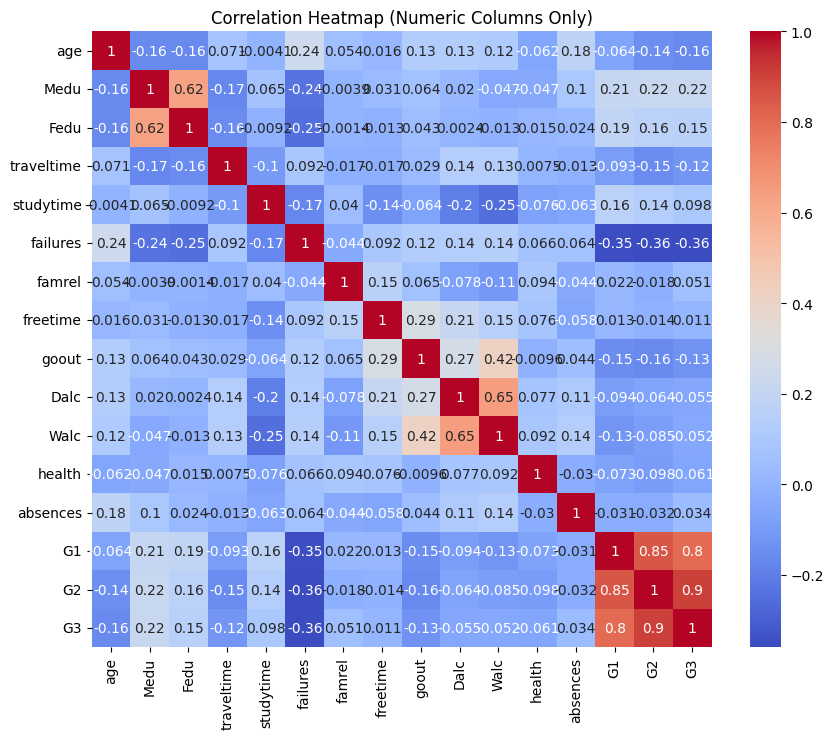

In [ ]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary ---")
print(df.describe())

print("\n--- Missing values ---")
print(df.isnull().sum())

numeric_df = df.select_dtypes(include=[np.number])

print("\n--- Correlation Matrix (numeric columns only) ---")
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [ ]:
df = df.dropna()

df["absences"] = np.where(df["absences"] > 40, 40, df["absences"])

print("✅ Missing values handled and outliers capped.")

✅ Missing values handled and outliers capped.


In [ ]:
df = pd.get_dummies(df, drop_first=True)
print("✅ Categorical variables encoded.")

✅ Categorical variables encoded.


In [ ]:
X = df[["studytime", "absences", "G1", "G2"]]
print(X.head())

   studytime  absences  G1  G2
0          2         6   5   6
1          2         4   5   5
2          2        10   7   8
3          3         2  15  14
4          2         4   6  10


In [ ]:
y = df["G3"]
print(y.head())

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 316
Testing samples: 79


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!



📊 Model Performance:
Mean Squared Error (MSE): 4.21
Root Mean Squared Error (RMSE): 2.05
R² Score: 0.79


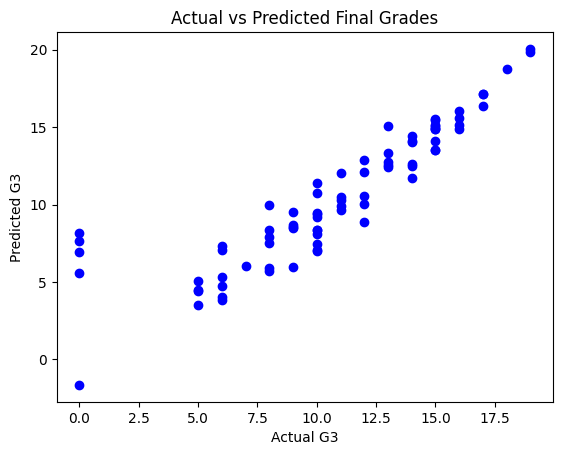

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Grades")
plt.show()

In [ ]:
import joblib
joblib.dump(model, "student_performance_model.pkl")
print("💾 Model saved as 'student_performance_model.pkl'")

files.download("student_performance_model.pkl")

💾 Model saved as 'student_performance_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>